In [2]:
import pandas as pd

df = pd.read_csv('TSLA.csv')


In [3]:
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
last_date = df['Date'].max()
one_year_ago = last_date - pd.DateOffset(years=1)

df = df[df['Date'] >= one_year_ago]


In [5]:
print(df.head())
print(df.tail())
print(len(df))  # number of rows


           Date        Open        High         Low       Close   Adj Close  \
3428 2024-02-12  192.110001  194.729996  187.279999  188.130005  188.130005   
3429 2024-02-13  183.990005  187.259995  182.110001  184.020004  184.020004   
3430 2024-02-14  185.300003  188.889999  183.350006  188.710007  188.710007   
3431 2024-02-15  189.160004  200.880005  188.860001  200.449997  200.449997   
3432 2024-02-16  202.059998  203.169998  197.399994  199.949997  199.949997   

         Volume  
3428   95498600  
3429   86759500  
3430   81203000  
3431  120831800  
3432  111173600  
           Date        Open        High         Low       Close   Adj Close  \
3675 2025-02-06  373.029999  375.399994  363.179993  374.320007  374.320007   
3676 2025-02-07  370.190002  380.549988  360.339996  361.619995  361.619995   
3677 2025-02-10  356.209991  362.700012  350.510010  350.730011  350.730011   
3678 2025-02-11  345.799988  349.369995  325.100006  328.500000  328.500000   
3679 2025-02-12  329.9

In [6]:
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']                             # Target


In [7]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test (without shuffling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


This plot shows how TSLA stock price moved over the last year. We visualize Open, High, Low, and Close prices on the graph to see overall trends.

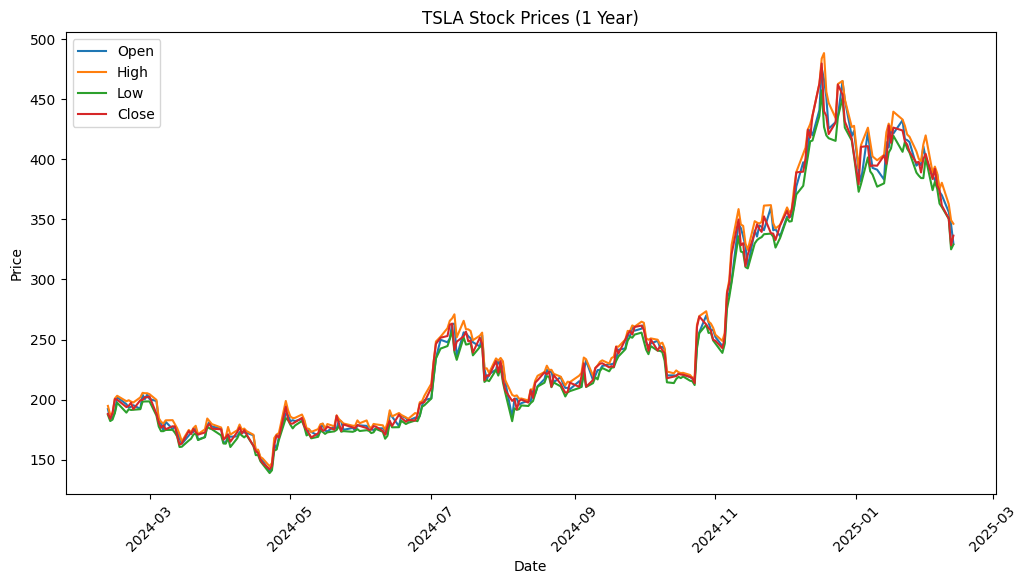

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('TSLA Stock Prices (1 Year)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


We need to split the data into training and testing. Feature scaling will be effective in large case .

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [11]:
# Selecting features and target
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression
Linear Regression models the relationship between features and the target variable assuming a linear dependency.

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


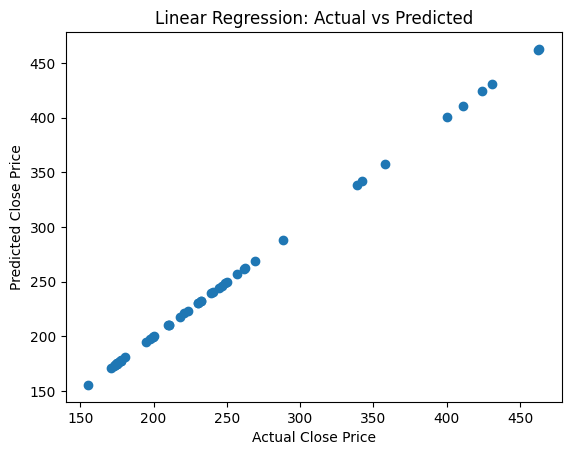

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


Polynomial Regression
Polynomial Regression captures non-linear relationships by transforming input features into polynomial features.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [16]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [17]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)


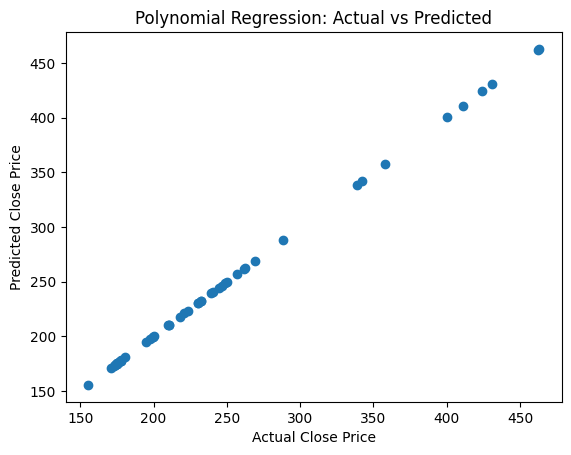

In [32]:
plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()


Decision Tree Regression
Decision Tree Regression models the target variable by learning decision rules from the features.
It can capture non-linear relationships but may overfit if not controlled

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


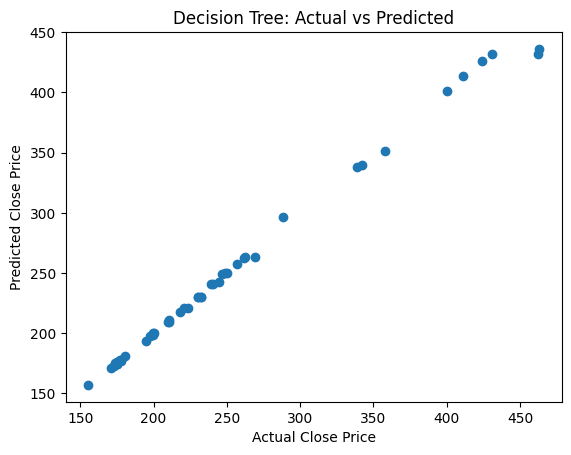

In [33]:
plt.figure()
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


Random Forest Regression
Random Forest is an ensemble learning method that builds multiple decision trees and averages their predictions.
It reduces overfitting and improves prediction stability.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


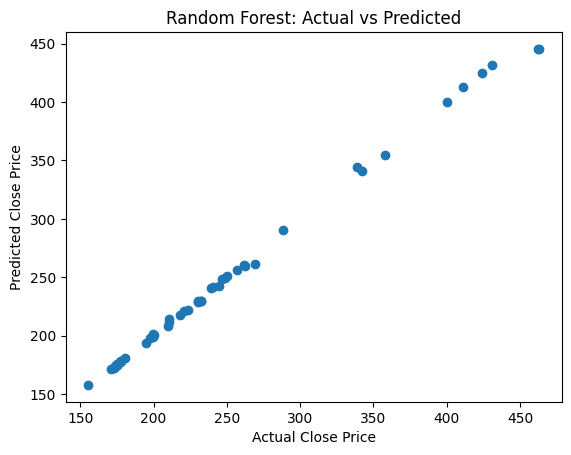

In [34]:
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


MODEL EVALUATION

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [24]:
y_pred_dt = dt.predict(X_test)


In [25]:
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))


In [26]:
print(y_pred_dt[:5])


[242.83999634 193.75999451 249.22999573 220.69999695 229.80999756]


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [29]:
# Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Polynomial Regression
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Decision Tree Regression
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Random Forest Regression
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))


RESULTS

In [30]:
print("Model Evaluation Results:\n")

print(f"Linear Regression -> R2: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")
print(f"Polynomial Regression -> R2: {r2_poly:.4f}, RMSE: {rmse_poly:.2f}")
print(f"Decision Tree -> R2: {r2_dt:.4f}, RMSE: {rmse_dt:.2f}")
print(f"Random Forest -> R2: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")


Model Evaluation Results:

Linear Regression -> R2: 1.0000, RMSE: 0.00
Polynomial Regression -> R2: 1.0000, RMSE: 0.00
Decision Tree -> R2: 0.9946, RMSE: 6.05
Random Forest -> R2: 0.9978, RMSE: 3.89
